# 1. Data Collection and preprocessing

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=7c863e746848722a8b14a35a585595377c8b6b37b4de373e1599d4ac58bfc65f
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


## **1.1. Import Libraries**

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

from sklearn.model_selection import GridSearchCV

from lime.lime_tabular import LimeTabularExplainer


In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()  # Upload one file at a time


Saving ThermocoupleData_2024-12_v2.parquet to ThermocoupleData_2024-12_v2.parquet


In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()  # Upload one file at a time


Saving ThermocoupleData_2025-01_v2.parquet to ThermocoupleData_2025-01_v2.parquet


In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()  # Upload one file at a time


Saving ThermocoupleData_2025-02_v2.parquet to ThermocoupleData_2025-02_v2.parquet


In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()  # Upload one file at a time


Saving ThermocoupleData_2025-03_v2.parquet to ThermocoupleData_2025-03_v2.parquet


In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()  # Upload one file at a time


Saving ThermocoupleData_2025-04_v2.parquet to ThermocoupleData_2025-04_v2.parquet


In [ ]:
file_paths = [
    "ThermocoupleData_2024-12_v2.parquet",
    "ThermocoupleData_2025-01_v2.parquet",
    "ThermocoupleData_2025-02_v2.parquet",
    "ThermocoupleData_2025-03_v2.parquet",
    "ThermocoupleData_2025-04_v2.parquet"
]


In [ ]:
dataframes = [pd.read_parquet(file) for file in file_paths]
merged_dataframe = pd.concat(dataframes, ignore_index=True)

print(merged_dataframe.head())


TagName            DateTime  AvgTemp_ZON1_M  AvgTemp_ZON2_M  AvgTemp_ZON3_M  \
0       2024-12-01 06:00:00      225.612808      415.796814      689.903320   
1       2024-12-01 06:01:00      205.604584      423.181458      686.330811   
2       2024-12-01 06:02:00      211.982300      429.162811      705.784119   
3       2024-12-01 06:03:00      203.708344      410.153381      710.513672   
4       2024-12-01 06:04:00      212.710144      406.177032      725.104126   

TagName  AvgTemp_ZON4_M  AvgTemp_ZON5_M  AvgTemp_ZON6_M  \
0            865.427979     1000.680115     1075.188354   
1            859.772339     1001.768982     1082.945679   
2            880.289551     1023.783264     1095.653442   
3            901.279968     1037.591797     1105.083496   
4            920.537903     1049.813232     1114.024902   

TagName  LineControlHastSverk4_1Act  UgnZon1BransleFlodeAr_Over  \
0                         13.846569                   92.936600   
1                         14.104885 

## **1.2. Data Collection**

In [ ]:
df = merged_dataframe

In [ ]:
# Thermocouple columns in Zone 1
zone1_tc = ['UgnZon1TempRegAr_TC1', 'UgnZon1TempSkyddAr_TC2', 'UgnZon1TempVaggOverBandAr_TC3', 'UgnZon1TempVaggUnderBandAr_TC4']

# Thermocouple columns in Zone 2
zone2_tc = ['UgnZon2TempAr_TC1', 'UgnZon2TempSkyddAr_TC2', 'UgnZon2TempVaggOverBandAr_TC3', 'UgnZon2TempVaggUnderBandAr_TC4']

# Thermocouple columns in Zone 3
zone3_tc = ['UgnZon3TempRegAr_TC1', 'UgnZon3TempSkyddAr_TC2', 'UgnZon3TempVaggAr_TC3', 'UgnZon3Temp_TC4_Ar', 'UgnZon3Temp_TC5_Ar']

# Thermocouple columns in Zone 4
zone4_tc = ['UgnZon4TempAr_TC1','UgnZon4TempSkyddAr_TC2', 'UgnZon4TempVaggAr_TC3']
# zone4_tc = ['UgnZon4TempAr_TC1','UgnZon4TempSkyddAr_TC2', 'UgnZon4TempVaggAr_TC3','UgnZon4TempVaggAr_TC4']

# Thermocouple columns in Zone 5
zone5_tc = ['UgnZon5TempAr_TC1', 'UgnZon5TempSkyddAr_TC2', 'UgnZon5TempVaggAr_TC3']

# Thermocouple columns in Zone 6
zone6_tc = ['UgnZon6TempAr_TC1','UgnZon6TempSkyddAr_TC2', 'UgnZon6TempUtgValvAr_TC5', 'UgnZon6TempVaggAr_TC3']


In [ ]:
# Define furnace groups tc(thermocouples)

f1_tc = zone1_tc + zone2_tc
f2_tc = zone3_tc + zone4_tc + zone5_tc + zone6_tc

F1_features = ['AvgTemp_ZON1_M', 'AvgTemp_ZON2_M', 'LineControlHastSverk4_1Act',
               'UgnZon1BransleFlodeAr_Over', 'UgnZon1BransleFlodeAr_Under', 'UgnZon1OljaFlodeAr_FT131',
               'UgnZon2BransleFlodeAr_Over', 'UgnZon2BransleFlodeAr_Under',  'UgnZon2OljaFlodeAr_FT231'] + zone1_tc + zone2_tc

F2_features = ['AvgTemp_ZON3_M', 'AvgTemp_ZON4_M', 'AvgTemp_ZON5_M', 'AvgTemp_ZON6_M', 'LineControlHastSverk4_1Act',
               'UgnZon3BransleFlodeAr_Over', 'UgnZon3BransleFlodeAr_Under', 'UgnZon3OljaFlodeAr_FT331',
               'UgnZon4BransleFlodeAr_Over', 'UgnZon4BransleFlodeAr_Under', 'UgnZon4OljaFlodeAr_FT431',
               'UgnZon5OljaFlodeAr_FT531',
               'UgnZon6OljaFlodeAr_FT631'] + zone3_tc + zone4_tc + zone5_tc + zone6_tc

# Extract time components
df["Hour"] = df["DateTime"].dt.hour
df["Day"] = df["DateTime"].dt.day
df["Month"] = df["DateTime"].dt.month
df["Week"] = df["DateTime"].dt.isocalendar().week

# Filtering relevant furnace data
df_F1 = df[F1_features + ["DateTime"]]
df_F2 = df[F2_features + ["DateTime"]]


In [ ]:
df.to_csv("Merged Dataset with Dec-April data.csv", index=False)

In [ ]:
df.head(25)

TagName,DateTime,AvgTemp_ZON1_M,AvgTemp_ZON2_M,AvgTemp_ZON3_M,AvgTemp_ZON4_M,AvgTemp_ZON5_M,AvgTemp_ZON6_M,LineControlHastSverk4_1Act,UgnZon1BransleFlodeAr_Over,UgnZon1BransleFlodeAr_Under,...,UgnZon5TempVaggAr_TC3,UgnZon6OljaFlodeAr_FT631,UgnZon6TempAr_TC1,UgnZon6TempSkyddAr_TC2,UgnZon6TempUtgValvAr_TC5,UgnZon6TempVaggAr_TC3,Hour,Day,Month,Week
0,2024-12-01 06:00:00,225.612808,415.796814,689.903320,865.427979,1000.680115,1075.188354,13.846569,92.936600,123.915466,...,1177.893555,252.840515,1143.0,1138.0,1101.157349,1219.907349,6,1,12,48
1,2024-12-01 06:01:00,205.604584,423.181458,686.330811,859.772339,1001.768982,1082.945679,14.104885,98.377281,131.169708,...,1197.338013,272.934418,1150.0,1146.0,1106.307861,1240.335693,6,1,12,48
2,2024-12-01 06:02:00,211.982300,429.162811,705.784119,880.289551,1023.783264,1095.653442,14.088474,61.410995,122.821991,...,1204.340210,270.664459,1155.0,1154.0,1110.474487,1250.694458,6,1,12,48
3,2024-12-01 06:03:00,203.708344,410.153381,710.513672,901.279968,1037.591797,1105.083496,14.080933,58.359055,116.718109,...,1209.953735,250.087967,1157.0,1156.0,1113.888916,1250.694458,6,1,12,48
4,2024-12-01 06:04:00,212.710144,406.177032,725.104126,920.537903,1049.813232,1114.024902,14.084775,64.961349,129.922699,...,1217.013916,238.564514,1156.0,1157.0,1115.277710,1246.411987,6,1,12,48
5,2024-12-01 06:05:00,200.329361,406.945404,729.392212,920.508911,1053.148682,1116.263672,14.098962,65.588112,131.176224,...,1221.238403,237.411865,1154.0,1154.0,1114.988403,1243.923584,6,1,12,48
6,2024-12-01 06:06:00,192.498062,385.592560,718.801453,919.147583,1055.165039,1118.604614,14.065612,62.650013,125.300026,...,1225.810181,231.952667,1155.0,1156.0,1117.708252,1244.675903,6,1,12,48
7,2024-12-01 06:07:00,203.160904,415.669464,745.141296,947.483643,1075.139038,1130.674194,14.137773,58.837139,117.674278,...,1234.548584,232.457535,1159.0,1161.0,1121.817139,1248.090210,6,1,12,48
8,2024-12-01 06:08:00,201.687256,415.062775,766.178040,970.168518,1091.914429,1140.644409,14.102732,67.844749,135.689499,...,1239.120361,229.061310,1162.0,1161.0,1125.000000,1250.289307,6,1,12,48
9,2024-12-01 06:09:00,213.240051,414.556122,770.807312,981.659790,1099.195312,1147.125366,14.130098,62.132984,124.265968,...,1242.592651,222.946091,1162.0,1161.0,1125.810181,1247.800903,6,1,12,48


In [ ]:
df.tail(25)

TagName,DateTime,AvgTemp_ZON1_M,AvgTemp_ZON2_M,AvgTemp_ZON3_M,AvgTemp_ZON4_M,AvgTemp_ZON5_M,AvgTemp_ZON6_M,LineControlHastSverk4_1Act,UgnZon1BransleFlodeAr_Over,UgnZon1BransleFlodeAr_Under,...,UgnZon5TempVaggAr_TC3,UgnZon6OljaFlodeAr_FT631,UgnZon6TempAr_TC1,UgnZon6TempSkyddAr_TC2,UgnZon6TempUtgValvAr_TC5,UgnZon6TempVaggAr_TC3,Hour,Day,Month,Week
207280,2025-04-24 05:36:00,220.289688,470.653290,801.898926,981.486755,1081.993286,1116.225342,14.422959,29.882208,119.528831,...,1184.490723,94.437042,1122.0,1128.0,1092.361084,1199.594849,5,24,4,17
207281,2025-04-24 05:37:00,212.570740,485.138702,826.453491,998.268433,1092.518677,1121.792236,14.346004,30.999043,123.996170,...,1191.840210,79.125755,1124.0,1125.0,1090.567139,1187.731445,5,24,4,17
207282,2025-04-24 05:38:00,131.794128,329.057831,851.633301,1019.245728,1107.668091,1126.395752,14.218709,35.256126,141.024506,...,1197.569458,70.854111,1127.0,1126.0,1091.261597,1184.259277,5,24,4,17
207283,2025-04-24 05:39:00,177.758636,398.535156,467.791840,733.434204,1103.559204,1128.795044,14.083123,59.259460,118.518921,...,1202.661987,80.220528,1131.0,1131.0,1095.601807,1187.442139,5,24,4,17
207284,2025-04-24 05:40:00,180.480957,401.422394,702.599182,894.012146,1014.435120,846.663025,14.101450,59.955761,119.911522,...,1197.395752,98.404617,1106.0,1108.0,1075.463013,1176.215210,5,24,4,17
207285,2025-04-24 05:41:00,175.192551,398.732513,709.216675,901.233521,1025.156738,1073.304443,14.076423,100.343475,133.791306,...,1208.854248,121.096237,1114.0,1111.0,1061.921265,1178.125000,5,24,4,17
207286,2025-04-24 05:42:00,204.071426,430.097260,747.467102,935.896484,1050.479614,1093.643677,14.026797,128.581970,128.581970,...,1224.016235,124.036613,1127.0,1124.0,1077.546265,1200.115723,5,24,4,17
207287,2025-04-24 05:43:00,198.816772,423.560303,752.454590,949.172791,1070.742432,1113.779907,13.929084,123.413696,123.413696,...,1232.291748,126.622208,1136.0,1133.0,1089.120361,1211.747681,5,24,4,17
207288,2025-04-24 05:44:00,208.142410,433.088989,762.090149,957.374023,1076.341553,1121.036499,13.790801,116.456512,116.456512,...,1235.358765,121.228310,1138.0,1136.0,1093.460693,1214.351807,5,24,4,17
207289,2025-04-24 05:45:00,188.839905,421.193787,747.836609,952.577515,1076.423584,1120.556152,13.793003,115.577019,115.577019,...,1236.400513,127.658005,1139.0,1138.0,1094.849487,1214.699097,5,24,4,17


In [ ]:
df.columns

Index(['DateTime', 'AvgTemp_ZON1_M', 'AvgTemp_ZON2_M', 'AvgTemp_ZON3_M',
       'AvgTemp_ZON4_M', 'AvgTemp_ZON5_M', 'AvgTemp_ZON6_M',
       'LineControlHastSverk4_1Act', 'UgnZon1BransleFlodeAr_Over',
       'UgnZon1BransleFlodeAr_Under', 'UgnZon1OljaFlodeAr_FT131',
       'UgnZon1TempRegAr_TC1', 'UgnZon1TempSkyddAr_TC2',
       'UgnZon1TempVaggOverBandAr_TC3', 'UgnZon1TempVaggUnderBandAr_TC4',
       'UgnZon2BransleFlodeAr_Over', 'UgnZon2BransleFlodeAr_Under',
       'UgnZon2OljaFlodeAr_FT231', 'UgnZon2TempAr_TC1',
       'UgnZon2TempSkyddAr_TC2', 'UgnZon2TempVaggOverBandAr_TC3',
       'UgnZon2TempVaggUnderBandAr_TC4', 'UgnZon3BransleFlodeAr_Over',
       'UgnZon3BransleFlodeAr_Under', 'UgnZon3OljaFlodeAr_FT331',
       'UgnZon3TempRegAr_TC1', 'UgnZon3TempSkyddAr_TC2',
       'UgnZon3TempVaggAr_TC3', 'UgnZon3Temp_TC4_Ar', 'UgnZon3Temp_TC5_Ar',
       'UgnZon4BransleFlodeAr_Over', 'UgnZon4BransleFlodeAr_Under',
       'UgnZon4OljaFlodeAr_FT431', 'UgnZon4TempAr_TC1',
       'UgnZon4Tem

In [ ]:
df.shape

(207305, 50)

## 1.3. Data Preprocessing

### 1.3.1 Handle missing values

In [ ]:
# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())


Missing Values in Dataset:
TagName
DateTime                              0
AvgTemp_ZON1_M                        4
AvgTemp_ZON2_M                        4
AvgTemp_ZON3_M                        4
AvgTemp_ZON4_M                        4
AvgTemp_ZON5_M                        4
AvgTemp_ZON6_M                        4
LineControlHastSverk4_1Act            6
UgnZon1BransleFlodeAr_Over            2
UgnZon1BransleFlodeAr_Under           2
UgnZon1OljaFlodeAr_FT131              6
UgnZon1TempRegAr_TC1                  6
UgnZon1TempSkyddAr_TC2                6
UgnZon1TempVaggOverBandAr_TC3         4
UgnZon1TempVaggUnderBandAr_TC4        4
UgnZon2BransleFlodeAr_Over            2
UgnZon2BransleFlodeAr_Under           2
UgnZon2OljaFlodeAr_FT231              6
UgnZon2TempAr_TC1                     6
UgnZon2TempSkyddAr_TC2                5
UgnZon2TempVaggOverBandAr_TC3         4
UgnZon2TempVaggUnderBandAr_TC4        5
UgnZon3BransleFlodeAr_Over            2
UgnZon3BransleFlodeAr_Under           2
UgnZ

Interpolation: Use trends in the data to infer missing values (e.g., linear or  interpolation).

In [ ]:

# Perform linear interpolation
df = df.interpolate(method='linear', limit_direction='both', axis=0)


In [ ]:
# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())


Missing Values in Dataset:
TagName
DateTime                          0
AvgTemp_ZON1_M                    0
AvgTemp_ZON2_M                    0
AvgTemp_ZON3_M                    0
AvgTemp_ZON4_M                    0
AvgTemp_ZON5_M                    0
AvgTemp_ZON6_M                    0
LineControlHastSverk4_1Act        0
UgnZon1BransleFlodeAr_Over        0
UgnZon1BransleFlodeAr_Under       0
UgnZon1OljaFlodeAr_FT131          0
UgnZon1TempRegAr_TC1              0
UgnZon1TempSkyddAr_TC2            0
UgnZon1TempVaggOverBandAr_TC3     0
UgnZon1TempVaggUnderBandAr_TC4    0
UgnZon2BransleFlodeAr_Over        0
UgnZon2BransleFlodeAr_Under       0
UgnZon2OljaFlodeAr_FT231          0
UgnZon2TempAr_TC1                 0
UgnZon2TempSkyddAr_TC2            0
UgnZon2TempVaggOverBandAr_TC3     0
UgnZon2TempVaggUnderBandAr_TC4    0
UgnZon3BransleFlodeAr_Over        0
UgnZon3BransleFlodeAr_Under       0
UgnZon3OljaFlodeAr_FT331          0
UgnZon3TempRegAr_TC1              0
UgnZon3TempSkyddAr_TC2      

In [ ]:
# Find columns where all values are 0
zero_columns = df.columns[(df == 0).all()]
print("Columns with all zero values:", zero_columns.tolist())

Columns with all zero values: ['UgnZon4TempVaggAr_TC4']


In [ ]:
df = df.drop(columns=zero_columns)

# Check remaining columns
print("Remaining columns:", df.columns)


Remaining columns: Index(['DateTime', 'AvgTemp_ZON1_M', 'AvgTemp_ZON2_M', 'AvgTemp_ZON3_M',
       'AvgTemp_ZON4_M', 'AvgTemp_ZON5_M', 'AvgTemp_ZON6_M',
       'LineControlHastSverk4_1Act', 'UgnZon1BransleFlodeAr_Over',
       'UgnZon1BransleFlodeAr_Under', 'UgnZon1OljaFlodeAr_FT131',
       'UgnZon1TempRegAr_TC1', 'UgnZon1TempSkyddAr_TC2',
       'UgnZon1TempVaggOverBandAr_TC3', 'UgnZon1TempVaggUnderBandAr_TC4',
       'UgnZon2BransleFlodeAr_Over', 'UgnZon2BransleFlodeAr_Under',
       'UgnZon2OljaFlodeAr_FT231', 'UgnZon2TempAr_TC1',
       'UgnZon2TempSkyddAr_TC2', 'UgnZon2TempVaggOverBandAr_TC3',
       'UgnZon2TempVaggUnderBandAr_TC4', 'UgnZon3BransleFlodeAr_Over',
       'UgnZon3BransleFlodeAr_Under', 'UgnZon3OljaFlodeAr_FT331',
       'UgnZon3TempRegAr_TC1', 'UgnZon3TempSkyddAr_TC2',
       'UgnZon3TempVaggAr_TC3', 'UgnZon3Temp_TC4_Ar', 'UgnZon3Temp_TC5_Ar',
       'UgnZon4BransleFlodeAr_Over', 'UgnZon4BransleFlodeAr_Under',
       'UgnZon4OljaFlodeAr_FT431', 'UgnZon4TempAr_TC1',

### 1.3.2 Feature Engineering

In [ ]:
# make 'DateTime' column is in the correct datetime format.
df['DateTime'] = pd.to_datetime(df['DateTime'])


In [ ]:
df['Month'] = df['DateTime'].dt.month
df['Week'] = df['DateTime'].dt.isocalendar().week
df['Day'] = df['DateTime'].dt.day_name()  # Or dt.dayofweek for numerical representation

We create a new column named Line_Stop to store the line stop status.

In [ ]:
# Create a new column 'Line_Stop' based on the condition
df['Line_Stop'] = (df['LineControlHastSverk4_1Act'] < 2).astype(int)

# 'Line_Stop' will be 1 if there's a line stop, 0 otherwise

In [ ]:
df.columns

Index(['DateTime', 'AvgTemp_ZON1_M', 'AvgTemp_ZON2_M', 'AvgTemp_ZON3_M',
       'AvgTemp_ZON4_M', 'AvgTemp_ZON5_M', 'AvgTemp_ZON6_M',
       'LineControlHastSverk4_1Act', 'UgnZon1BransleFlodeAr_Over',
       'UgnZon1BransleFlodeAr_Under', 'UgnZon1OljaFlodeAr_FT131',
       'UgnZon1TempRegAr_TC1', 'UgnZon1TempSkyddAr_TC2',
       'UgnZon1TempVaggOverBandAr_TC3', 'UgnZon1TempVaggUnderBandAr_TC4',
       'UgnZon2BransleFlodeAr_Over', 'UgnZon2BransleFlodeAr_Under',
       'UgnZon2OljaFlodeAr_FT231', 'UgnZon2TempAr_TC1',
       'UgnZon2TempSkyddAr_TC2', 'UgnZon2TempVaggOverBandAr_TC3',
       'UgnZon2TempVaggUnderBandAr_TC4', 'UgnZon3BransleFlodeAr_Over',
       'UgnZon3BransleFlodeAr_Under', 'UgnZon3OljaFlodeAr_FT331',
       'UgnZon3TempRegAr_TC1', 'UgnZon3TempSkyddAr_TC2',
       'UgnZon3TempVaggAr_TC3', 'UgnZon3Temp_TC4_Ar', 'UgnZon3Temp_TC5_Ar',
       'UgnZon4BransleFlodeAr_Over', 'UgnZon4BransleFlodeAr_Under',
       'UgnZon4OljaFlodeAr_FT431', 'UgnZon4TempAr_TC1',
       'UgnZon4Tem

In [ ]:
df.to_csv("Cleaned Dataset with Dec-April data.csv", index=False)

### 1.3.3 Scaling

In [ ]:

# Columns to scale
columns_to_scale = [
    'AvgTemp_ZON1_M', 'AvgTemp_ZON2_M', 'AvgTemp_ZON3_M', 'AvgTemp_ZON4_M',
    'AvgTemp_ZON5_M', 'AvgTemp_ZON6_M', 'LineControlHastSverk4_1Act',
    'UgnZon1BransleFlodeAr_Over', 'UgnZon1BransleFlodeAr_Under',
    'UgnZon1OljaFlodeAr_FT131', 'UgnZon1TempRegAr_TC1',
    'UgnZon1TempSkyddAr_TC2', 'UgnZon1TempVaggOverBandAr_TC3',
    'UgnZon1TempVaggUnderBandAr_TC4', 'UgnZon2BransleFlodeAr_Over',
    'UgnZon2BransleFlodeAr_Under', 'UgnZon2OljaFlodeAr_FT231',
    'UgnZon2TempAr_TC1', 'UgnZon2TempSkyddAr_TC2',
    'UgnZon2TempVaggOverBandAr_TC3', 'UgnZon2TempVaggUnderBandAr_TC4',
    'UgnZon3BransleFlodeAr_Over', 'UgnZon3BransleFlodeAr_Under',
    'UgnZon3OljaFlodeAr_FT331', 'UgnZon3TempRegAr_TC1',
    'UgnZon3TempSkyddAr_TC2', 'UgnZon3TempVaggAr_TC3',
    'UgnZon3Temp_TC4_Ar', 'UgnZon3Temp_TC5_Ar',
    'UgnZon4BransleFlodeAr_Over', 'UgnZon4BransleFlodeAr_Under',
    'UgnZon4OljaFlodeAr_FT431', 'UgnZon4TempAr_TC1',
    'UgnZon4TempSkyddAr_TC2', 'UgnZon4TempVaggAr_TC3',
    'UgnZon5OljaFlodeAr_FT531', 'UgnZon5TempAr_TC1',
    'UgnZon5TempSkyddAr_TC2', 'UgnZon5TempVaggAr_TC3',
    'UgnZon6OljaFlodeAr_FT631', 'UgnZon6TempAr_TC1',
    'UgnZon6TempSkyddAr_TC2', 'UgnZon6TempUtgValvAr_TC5',
    'UgnZon6TempVaggAr_TC3'
]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [ ]:
df[F1_features]

TagName,AvgTemp_ZON1_M,AvgTemp_ZON2_M,LineControlHastSverk4_1Act,UgnZon1BransleFlodeAr_Over,UgnZon1BransleFlodeAr_Under,UgnZon1OljaFlodeAr_FT131,UgnZon2BransleFlodeAr_Over,UgnZon2BransleFlodeAr_Under,UgnZon2OljaFlodeAr_FT231,UgnZon1TempRegAr_TC1,UgnZon1TempSkyddAr_TC2,UgnZon1TempVaggOverBandAr_TC3,UgnZon1TempVaggUnderBandAr_TC4,UgnZon2TempAr_TC1,UgnZon2TempSkyddAr_TC2,UgnZon2TempVaggOverBandAr_TC3,UgnZon2TempVaggUnderBandAr_TC4
0,-0.485897,-0.798568,0.622110,0.367008,0.635188,0.509053,-0.063458,0.536695,0.251063,0.776683,0.771023,0.834213,0.975120,0.612485,0.544534,0.839648,0.408814
1,-0.622661,-0.737258,0.657445,0.437226,0.751360,0.605930,-0.053488,0.557959,0.267798,0.707997,0.695453,0.824107,0.932627,0.618534,0.550078,0.844891,0.559113
2,-0.579067,-0.687598,0.655200,-0.039866,0.617676,0.260131,-0.033468,0.600663,0.301406,0.671877,0.670264,0.805475,0.903852,0.642732,0.561165,0.870800,0.562959
3,-0.635622,-0.845423,0.654168,-0.079254,0.519926,0.186336,-0.074318,0.513530,0.232883,0.584539,0.579580,0.732525,0.748938,0.642732,0.561165,0.875426,0.454961
4,-0.574092,-0.878436,0.654694,0.005956,0.731390,0.347861,-0.061117,0.541689,0.254482,0.530656,0.524162,0.707894,0.673322,0.612485,0.538990,0.855070,0.415223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207300,-0.618420,-0.518443,0.376315,-0.029608,0.643133,0.278973,0.801756,0.206262,0.480323,0.443909,0.388137,0.504204,0.519411,0.963347,0.976954,0.872959,1.147812
207301,-0.542503,-0.331187,0.361457,0.042531,0.822159,0.407476,0.663365,0.088189,0.347532,0.435619,0.378061,0.535784,0.518407,0.945199,0.954779,0.837181,1.121533
207302,-1.089800,-1.602807,0.344745,0.427080,0.734575,0.592525,0.660659,0.085880,0.344936,0.416968,0.357909,0.498204,0.508370,0.921001,0.927059,0.782588,1.071541
207303,-0.778654,-1.774853,0.308713,1.150025,0.618693,0.965995,0.538065,-0.018716,0.227341,0.489503,0.433478,0.479572,0.601385,0.854459,0.849446,0.723986,1.006806


In [ ]:
df[F2_features]

TagName,AvgTemp_ZON3_M,AvgTemp_ZON4_M,AvgTemp_ZON5_M,AvgTemp_ZON6_M,LineControlHastSverk4_1Act,UgnZon3BransleFlodeAr_Over,UgnZon3BransleFlodeAr_Under,UgnZon3OljaFlodeAr_FT331,UgnZon4BransleFlodeAr_Over,UgnZon4BransleFlodeAr_Under,...,UgnZon4TempAr_TC1,UgnZon4TempSkyddAr_TC2,UgnZon4TempVaggAr_TC3,UgnZon5TempAr_TC1,UgnZon5TempSkyddAr_TC2,UgnZon5TempVaggAr_TC3,UgnZon6TempAr_TC1,UgnZon6TempSkyddAr_TC2,UgnZon6TempUtgValvAr_TC5,UgnZon6TempVaggAr_TC3
0,-0.800079,-0.595006,-0.322997,-0.072910,0.622110,1.280192,0.091678,0.281350,1.166372,-0.132030,...,0.326589,0.388121,0.478870,0.286425,0.287245,0.486737,0.508378,0.509736,0.434526,0.793394
1,-0.827208,-0.634597,-0.315834,-0.023471,0.657445,1.330793,0.275073,0.463135,1.926231,-0.137346,...,0.395757,0.459674,0.528406,0.321442,0.336719,0.572183,0.541580,0.548200,0.460168,0.880075
2,-0.679484,-0.490970,-0.171021,0.057517,0.655200,1.544945,0.434302,0.647628,1.854901,0.039064,...,0.494568,0.572115,0.602840,0.366464,0.376299,0.602953,0.565296,0.586665,0.480911,0.924029
3,-0.643569,-0.344030,-0.080187,0.117616,0.654168,1.598120,0.473839,0.693635,1.854089,0.038697,...,0.563735,0.628335,0.656739,0.401482,0.410931,0.627620,0.574783,0.596281,0.497910,0.924029
4,-0.532773,-0.209218,0.000207,0.174601,0.654694,1.698785,0.548687,0.780499,2.525472,0.013544,...,0.623022,0.684556,0.711152,0.431496,0.445563,0.658645,0.570039,0.601090,0.504824,0.905857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207300,-0.199199,0.004425,0.150726,0.205995,0.376315,1.612918,0.311582,0.541980,1.037985,-0.394200,...,0.711952,0.689667,0.766849,0.711633,0.722619,0.721712,0.479919,0.500120,0.398513,0.733969
207301,-0.084866,0.120740,0.243370,0.245139,0.361457,1.666762,0.347168,0.584396,1.201794,-0.327593,...,0.731714,0.720332,0.777629,0.721638,0.727567,0.726798,0.489405,0.504928,0.413783,0.713589
207302,0.125873,0.328165,0.338151,0.294127,0.344745,1.679719,0.355732,0.596392,1.214342,-0.322491,...,0.756417,0.740776,0.798675,0.736645,0.747357,0.721203,0.494149,0.509736,0.431069,0.697382
207303,-1.841309,0.337873,0.380713,0.333605,0.308713,1.776137,0.419456,0.671774,1.127870,-0.152904,...,0.771239,0.756109,0.825111,0.761658,0.762199,0.743073,0.513121,0.528968,0.459592,0.726848


# 2. Exploratory Data Analysis (EDA)

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
TagName,,,,,,,,
DateTime,207305,2025-02-11 05:40:35.012180992,2024-12-01 06:00:00,2025-01-06 05:45:00,2025-02-11 05:30:00,2025-03-19 05:15:00,2025-04-24 06:00:00,NaN
AvgTemp_ZON1_M,207305.0,-0.0,-2.028044,-0.600336,-0.114411,0.194692,5.878081,1.000002
AvgTemp_ZON2_M,207305.0,-0.0,-4.250693,-0.501983,-0.016993,0.393547,5.181659,1.000002
AvgTemp_ZON3_M,207305.0,-0.0,-5.824628,-0.258034,0.022135,0.44852,3.196402,1.000002
AvgTemp_ZON4_M,207305.0,0.0,-6.43927,-0.130794,0.045602,0.403819,2.228213,1.000002
AvgTemp_ZON5_M,207305.0,0.0,-6.905603,-0.061888,0.137627,0.338629,1.576434,1.000002
AvgTemp_ZON6_M,207305.0,-0.0,-6.925238,0.023293,0.165351,0.361349,1.387712,1.000002
LineControlHastSverk4_1Act,207305.0,-0.0,-1.521737,-1.271923,0.151437,0.689361,2.060857,1.000002
UgnZon1BransleFlodeAr_Over,207305.0,0.0,-0.832443,-0.832443,-0.463228,0.762826,5.108281,1.000002


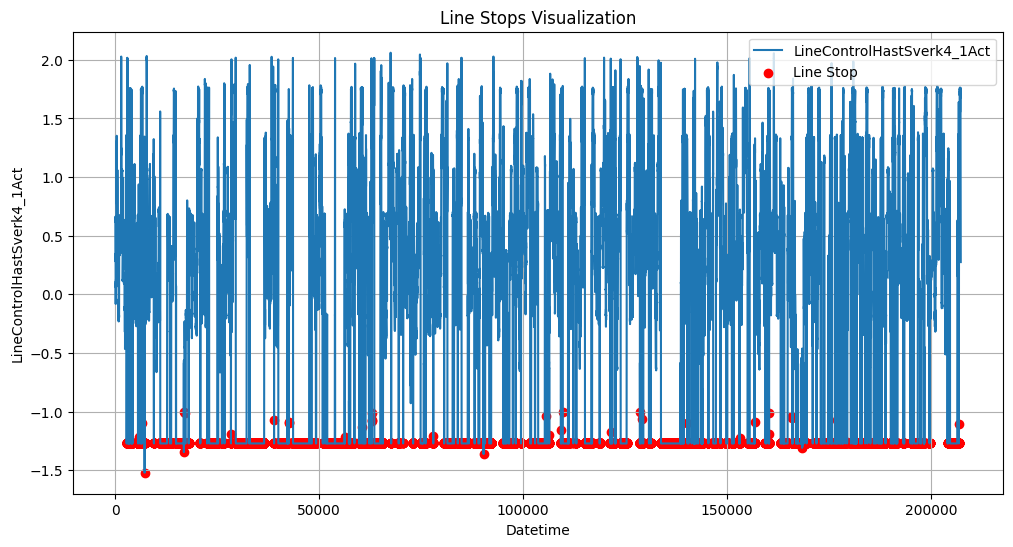

In [ ]:
# Plot 'LineControlHastSverk4_1Act' and highlight line stops
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['LineControlHastSverk4_1Act'], label='LineControlHastSverk4_1Act')

# Highlight line stops using red dots
line_stop_indices = df[df['Line_Stop'] == 1].index
plt.scatter(line_stop_indices, df.loc[line_stop_indices, 'LineControlHastSverk4_1Act'], color='red', label='Line Stop', marker='o')

plt.xlabel('Datetime')
plt.ylabel('LineControlHastSverk4_1Act')
plt.title('Line Stops Visualization')
plt.legend()
plt.grid(True)
plt.show()

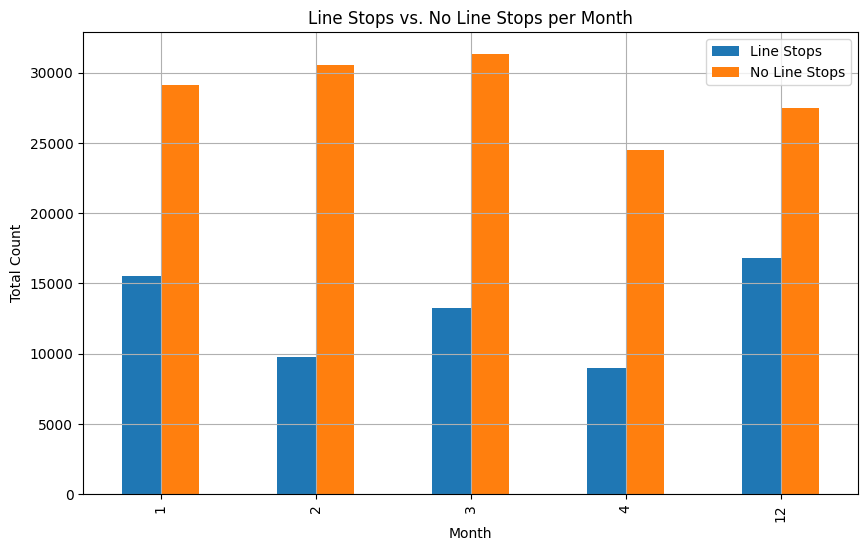

In [ ]:
line_stops_per_month = df.groupby('Month')['Line_Stop'].sum()
no_line_stops_per_month = df.groupby('Month')['Line_Stop'].apply(lambda x: (x == 0).sum())

#  Using pandas DataFrame
line_stop_data = pd.DataFrame({
    'Line Stops': line_stops_per_month,
    'No Line Stops': no_line_stops_per_month
})

# Plotting from line stop DataFrame
line_stop_data.plot(kind='bar', figsize=(10, 6))
# Common plot elements
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.title('Line Stops vs. No Line Stops per Month')
plt.legend()
plt.grid(True)
plt.show()



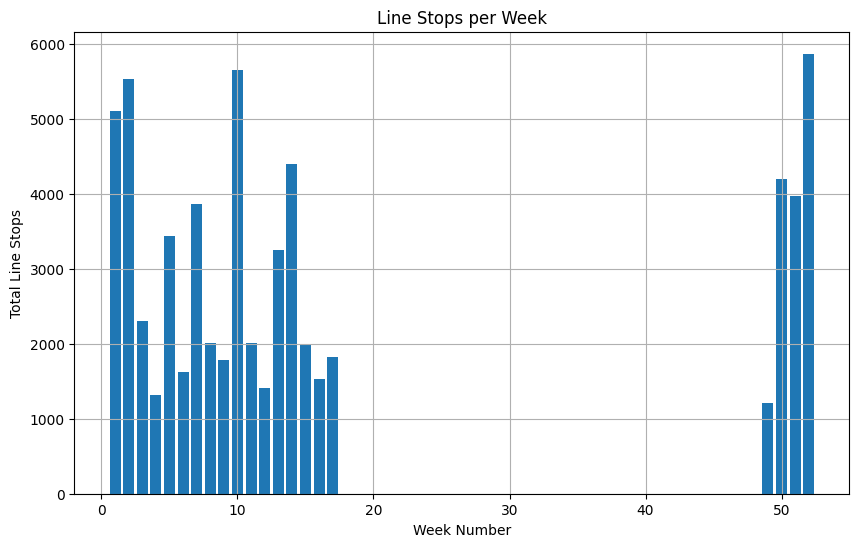

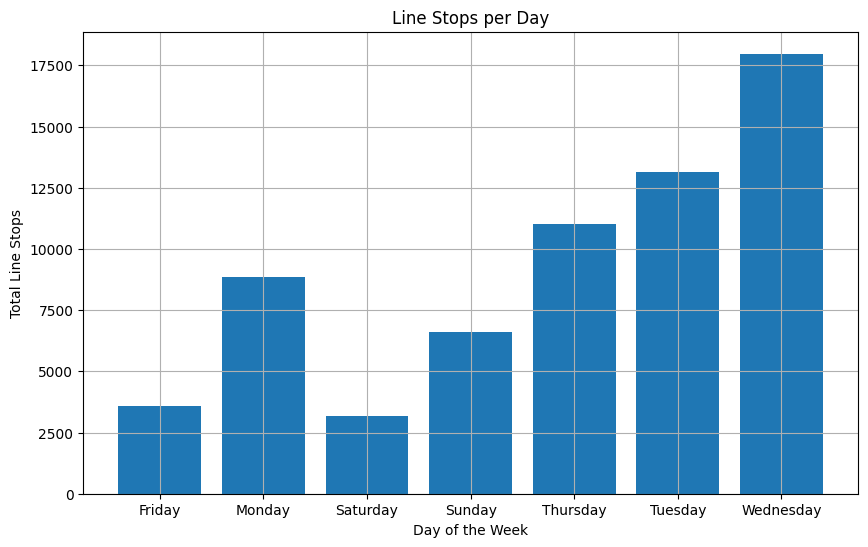

In [ ]:
# Line stops per week
line_stops_per_week = df.groupby('Week')['Line_Stop'].sum()

# Line stops per day of the week
line_stops_per_day = df.groupby('Day')['Line_Stop'].sum()


# Plot line stops per week
plt.figure(figsize=(10, 6))
plt.bar(line_stops_per_week.index, line_stops_per_week.values)
plt.xlabel('Week Number')
plt.ylabel('Total Line Stops')
plt.title('Line Stops per Week')
plt.grid(True)
plt.show()

# Plot line stops per day of the week
plt.figure(figsize=(10, 6))
plt.bar(line_stops_per_day.index, line_stops_per_day.values)
plt.xlabel('Day of the Week')
plt.ylabel('Total Line Stops')
plt.title('Line Stops per Day')
plt.grid(True)
plt.show()

## 2.1 Correlation Analysis & Heatmaps

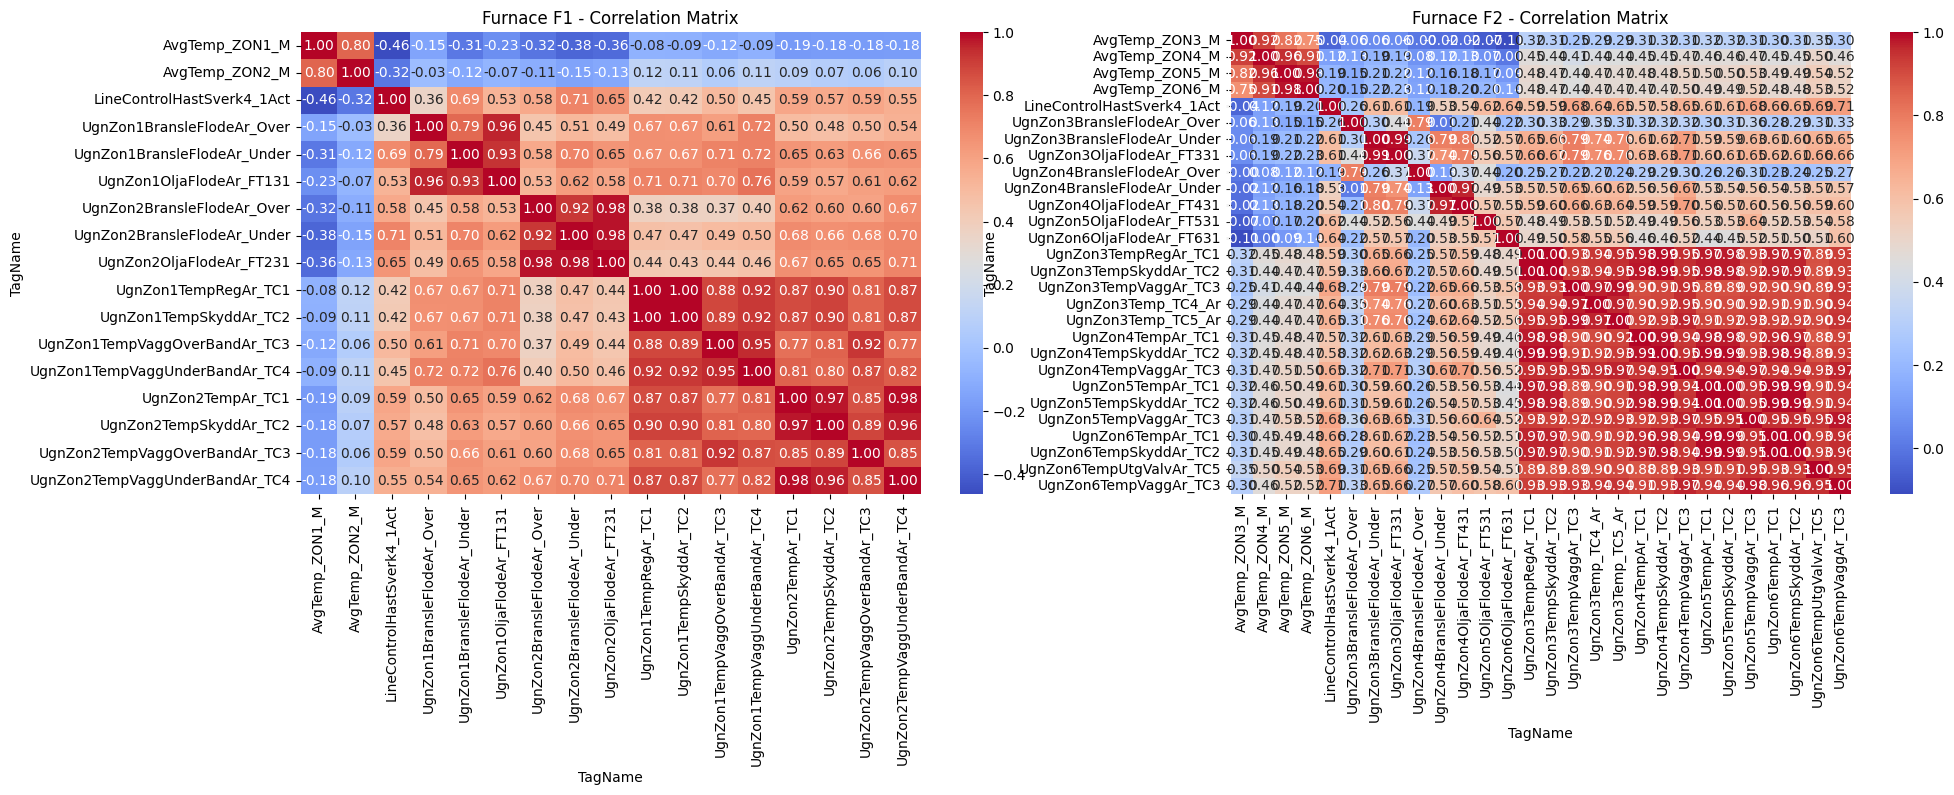

In [ ]:
# Compute correlation matrices
corr_F1 = df[F1_features].corr()
corr_F2 = df[F2_features].corr()

# Plot heatmaps separately
fig, axes = plt.subplots(1, 2, figsize=(22, 6))

sns.heatmap(corr_F1, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Furnace F1 - Correlation Matrix")

sns.heatmap(corr_F2, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Furnace F2 - Correlation Matrix")

plt.show()

## 2.2) Trend & Seasonality Analysis for High-Frequency (Seconds) Data

Since we have temperature data which is recorded every second, analyzing trends and seasonality requires aggregation & smoothing techniques to reveal meaningful patterns.

Approaches for Trend & Seasonality Analysis:
Resampling (Aggregating to higher-level intervals like hourly, daily)

Rolling Averages & Moving Windows (To smooth fluctuations)

Fourier Transform (To capture periodicity)

STL Decomposition (Modified for high-frequency data)

####  2.2.1) Resampling (Aggregating to Hourly or Daily Trends)
Since raw second-level data is too granular, resampling to hourly or daily intervals makes trends clearer.

In [ ]:
# Resample to hourly mean
df_hourly = df.resample("H", on="DateTime").mean()

# Resample to daily mean
df_daily = df.resample("D", on="DateTime").mean()

# Plot daily trend for Furnace F1 Zone 1 temperature
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index, df_daily["UgnZon1TempRegAr_TC1"], label="Daily Avg Temp", color="blue")
plt.title("Daily Temperature Trend - Furnace F1 Zone 1")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()


<ipython-input-36-d2a091c8967c>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample("H", on="DateTime").mean()


TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
# Plot daily trend for all thermocouples
plt.figure(figsize=(12, 6))
for tc in zone1_tc:
    plt.plot(df_daily.index, df_daily[tc], label=tc)

plt.title("Daily Temperature Trends - Furnace F1 (Zone 1 Thermocouples)")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [ ]:
# Plot daily trend for all thermocouples in furnace 1
plt.figure(figsize=(12, 6))
for tc in f1_tc:
    plt.plot(df_daily.index, df_daily[tc], label=tc)

plt.title("Daily Temperature Trends - Furnace F1")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [ ]:
# Plot daily trend for all thermocouples in furnace 2
plt.figure(figsize=(12, 6))
for tc in f2_tc:
    plt.plot(df_daily.index, df_daily[tc], label=tc)

plt.title("Daily Temperature Trends - Furnace F2")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

#### 2.2.2) Rolling Averages (Smoothing Short-Term Variations)
Using 7-day moving averages for all thermocouples.

In [ ]:
plt.figure(figsize=(12, 6))

for tc in f1_tc:
    df_daily[tc + "_7day_avg"] = df_daily[tc].rolling(window=7).mean()
    plt.plot(df_daily.index, df_daily[tc + "_7day_avg"], label=tc + " - 7-Day Moving Avg")

plt.title("Smoothed Temperature Trend - Furnace F1 ")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(12, 8))

for tc in f2_tc:
    df_daily[tc + "_7day_avg"] = df_daily[tc].rolling(window=7).mean()
    plt.plot(df_daily.index, df_daily[tc + "_7day_avg"], label=tc + " - 7-Day Moving Avg")

plt.title("Smoothed Temperature Trend - Furnace F2")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()


#### 2.2.3) Fourier Transform (Finding Cyclic Patterns)
For periodicity detection, Fast Fourier Transform (FFT) helps analyze underlying frequencies in temperature data.

In [ ]:
# Apply FFT
signal = df_hourly["UgnZon1TempRegAr_TC1"].dropna()
fft_values = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal))

# Plot Fourier Transform
plt.figure(figsize=(10, 5))
plt.plot(frequencies, abs(fft_values))
plt.title("Fourier Transform - Detecting Periodicity in Temperature(Zone 1 TC1) Data")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()


In this Fourier plot, there is a high amplitude at frequency = 0, which suggests that the temperature readings have a strong constant or very slow-changing trend rather than clear cyclic variations. Since no strong peaks emerge beyond frequency = 0, it suggests no strong periodic patterns.

#### 2.2.4) STL Decomposition
Since Seasonal-Trend decomposition method(STL) decomposition works best for hourly data, applying it to each thermocouple separately.

In [ ]:
from statsmodels.tsa.seasonal import STL

fig, axes = plt.subplots(len(f1_tc), 3, figsize=(12, 10))

for i, tc in enumerate(f1_tc):
    stl = STL(df_hourly[tc], period=24)  # Hourly seasonality
    result = stl.fit()

    result.trend.plot(ax=axes[i, 0], title=f"Trend - {tc}")
    result.seasonal.plot(ax=axes[i, 1], title=f"Seasonality - {tc}")
    result.resid.plot(ax=axes[i, 2], title=f"Residuals - {tc}")

plt.tight_layout()
plt.show()


In [ ]:

fig, axes = plt.subplots(len(f2_tc), 3, figsize=(38, 12))

plt.title("Furnace 2- trend/seasonality analysis")
for i, tc in enumerate(f2_tc):
    stl = STL(df_hourly[tc], period=24)  # Hourly seasonality
    result = stl.fit()

    result.trend.plot(ax=axes[i, 0], title=f"Trend - {tc}")
    result.seasonal.plot(ax=axes[i, 1], title=f"Seasonality - {tc}")
    result.resid.plot(ax=axes[i, 2], title=f"Residuals - {tc}")


plt.tight_layout()
plt.show()


Trend analysis, smoothing, and seasonality decomposition completed for all thermocouples in both furnaces.

The rolling average smooths short-term variations.

STL decomposition captures trends and cyclic seasonality for each thermocouple.

Resampling ensures meaningful patterns emerge from second-level data.

# 3) Model building

## 3.1) Train/test/validation splitting

In [ ]:
# Define target variable and input features for furnace 1 (f1) and furnace 2(f2)

#Furnace 1:
target_f1 = zone1_tc + zone2_tc
input_f1  = ['AvgTemp_ZON1_M', 'AvgTemp_ZON2_M', 'LineControlHastSverk4_1Act',
               'UgnZon1BransleFlodeAr_Over', 'UgnZon1BransleFlodeAr_Under', 'UgnZon1OljaFlodeAr_FT131',
               'UgnZon2BransleFlodeAr_Over', 'UgnZon2BransleFlodeAr_Under',  'UgnZon2OljaFlodeAr_FT231']
#Furnace 2:
input_f2 = ['AvgTemp_ZON3_M', 'AvgTemp_ZON4_M', 'AvgTemp_ZON5_M', 'AvgTemp_ZON6_M', 'LineControlHastSverk4_1Act',
               'UgnZon3BransleFlodeAr_Over', 'UgnZon3BransleFlodeAr_Under', 'UgnZon3OljaFlodeAr_FT331',
               'UgnZon4BransleFlodeAr_Over', 'UgnZon4BransleFlodeAr_Under', 'UgnZon4OljaFlodeAr_FT431',
               'UgnZon5OljaFlodeAr_FT531',
               'UgnZon6OljaFlodeAr_FT631']
target_f2 = zone3_tc + zone4_tc + zone5_tc + zone6_tc


X_f1 = df[input_f1]
y_f1 = df[target_f1]

X_f2 = df[input_f2]
y_f2 = df[target_f2]




## 3.2 Furnace 1 : Model evaluation

In [ ]:
# Split dataset (70-20-10 split)
#X_train, X_temp, y_train, y_temp = train_test_split(X_f1, y_f1, test_size=0.3, shuffle=False)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, shuffle=False)

In [ ]:
# Define time intervals for splitting
training_start = '2024-12-01 06:00:00'
training_end = '2025-03-01 05:59:00'
test_start = '2025-03-01 06:00:00'
test_end = '2025-04-01 05:59:00'
validation_start = '2025-04-01 06:00:00'
validation_end = '2025-04-24 06:00:00'

# Split the data based on intervals
train_data = df[(df['DateTime'] >= training_start) & (df['DateTime'] <= training_end)]
test_data = df[(df['DateTime'] >= test_start) & (df['DateTime'] <= test_end)]
val_data = df[(df['DateTime'] >= validation_start) & (df['DateTime'] <= validation_end)]

# Separate features (X) and labels (y) for training, testing, and validation sets
X_train = train_data[input_f1]
y_train = train_data[target_f1]

X_test = test_data[input_f1]
y_test = test_data[target_f1]

X_val = val_data[input_f1]
y_val = val_data[target_f1]

# Check the sizes of the splits (optional)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


X_train shape: (129602, 9)
y_train shape: (129602, 8)
X_test shape: (44581, 9)
y_test shape: (44581, 8)
X_val shape: (33122, 9)
y_val shape: (33122, 8)


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time

# Train Ridge Model
ridge = Ridge()
start_time = time.time()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
execution_time = time.time() - start_time
time_ridge = round(execution_time, 2)


# Evaluation
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred))
mae_ridge = mean_absolute_error(y_test, y_pred)
r2_ridge = r2_score(y_test, y_pred)
print(f"Ridge Regression - RMSE: {rmse_ridge}, MAE: {mae_ridge}, R²: {r2_ridge}, Time: {time_ridge}s")


Ridge Regression - RMSE: 1.0933878161385477, MAE: 0.633171099302694, R²: 0.38552500325382033, Time: 0.04s


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
start_time = time.time()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
execution_time = time.time() - start_time

# Evaluation
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
time_rf = round(execution_time, 2)
print(f"Random Forest - RMSE: {rmse_rf}, MAE: {mae_rf}, R²: {r2_rf}, Time: {time_rf}s")


Random Forest - RMSE: 1.1009079121923862, MAE: 0.5642652670601662, R²: 0.3779374037948475, Time: 213.83s


In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100)
start_time = time.time()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
execution_time = time.time() - start_time

# Evaluation
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
mae_xgb = mean_absolute_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)
time_xgb = round(execution_time, 2)
print(f"XGBoost - RMSE: {rmse_xgb}, MAE: {mae_xgb}, R²: {r2_xgb}, Time: {time_xgb}s")


XGBoost - RMSE: 1.0585076553976072, MAE: 0.5387738347053528, R²: 0.4262109100818634, Time: 10.05s


In [ ]:
# Reshape data for LSTM input (samples, timesteps, features)
X_train_LSTM = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_LSTM = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

#  Define LSTM model with correct output shape
lstm_model = Sequential([
    LSTM(50, activation="relu", return_sequences=True, input_shape=(1, X_train.shape[1])),
    LSTM(50, activation="relu"),
    Dense(8)  # Output layer should match number of target variables
])

# Compile and fit
lstm_model.compile(optimizer="adam", loss="mse")
start_time = time.time()
lstm_model.fit(X_train_LSTM, y_train, epochs=10, batch_size=16, verbose=0)
execution_time = time.time() - start_time

# Predictions
y_pred = lstm_model.predict(X_test_LSTM)

# Evaluation
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred))
mae_lstm = mean_absolute_error(y_test, y_pred)
r2_lstm = r2_score(y_test, y_pred)
time_lstm = round(execution_time, 2)
print(f"LSTM - RMSE: {rmse_lstm}, MAE: {mae_lstm}, R²: {r2_lstm}, Time: {time_lstm}s")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1394/1394 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
LSTM - RMSE: 1.045016845950637, MAE: 0.5465670228004456, R²: 0.44040220975875854, Time: 308.06s


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
import numpy as np

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
start_time = time.time()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
execution_time_lasso = time.time() - start_time

# Evaluation
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
time_lasso = round(execution_time_lasso, 2)
print(f"Lasso - RMSE: {rmse_lasso}, MAE: {mae_lasso}, R²: {r2_lasso}, Time: {time_lasso}s")


Lasso - RMSE: 1.4085843752447944, MAE: 0.9483591356998563, R²: -0.0265835732682409, Time: 0.1s


In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
import numpy as np

# Convert targets to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape to 2D if targets are 1D
if y_train.ndim == 1:
    y_train = y_train.reshape(-1, 1)
if y_test.ndim == 1:
    y_test = y_test.reshape(-1, 1)

# Initialize lists to collect metrics

rmse_list, mae_list, r2_list = [], [], []


start_time = time.time()

for i in range(y_train.shape[1]):
    try:
        # Fit ARIMA to one target column
        model = sm.tsa.ARIMA(y_train[:, i], order=(1, 1, 1))
        model_fit = model.fit()
        y_pred = model_fit.forecast(steps=len(y_test))

        # Ensure shapes match
        y_true = y_test[:, i]
        y_pred = np.array(y_pred)

        # Compute metrics
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)

        # Store metrics
        rmse_list.append(rmse)
        mae_list.append(mae)
        r2_list.append(r2)
    except Exception as e:
        print(f"Column {i} failed with error: {e}")

execution_time = time.time() - start_time

# Aggregate metrics
rmse_arima = np.mean(rmse_list)
mae_arima = np.mean(mae_list)
r2_arima = np.mean(r2_list)
time_arima = round(execution_time, 2)

print(f"ARIMA - RMSE: {rmse_arima}, MAE: {mae_arima}, R²: {r2_arima}, Time: {time_arima}s")


ARIMA - RMSE: 1.632875358101053, MAE: 1.1169436445071144, R²: -0.40519310364934413, Time: 214.1s


In [ ]:
# Define results for each model
model_results = {
    "Model": ["Ridge Regression", "Random Forest", "XGBoost", "LSTM", "Lasso", "ARIMA"],
    "RMSE": [rmse_ridge, rmse_rf, rmse_xgb, rmse_lstm,rmse_lasso,rmse_arima],
    "MAE": [mae_ridge, mae_rf, mae_xgb, mae_lstm,mae_lasso,mae_arima],
    "R² Score": [r2_ridge, r2_rf, r2_xgb, r2_lstm,r2_lasso,r2_arima],
    "Execution Time (s)": [time_ridge, time_rf, time_xgb, time_lstm,time_lasso,time_arima]
}

# Convert to DataFrame
summary_df = pd.DataFrame(model_results)

# Display table
print(summary_df)


              Model      RMSE       MAE  R² Score  Execution Time (s)
0  Ridge Regression  1.093388  0.633171  0.385525                0.04
1     Random Forest  1.100908  0.564265  0.377937              213.83
2           XGBoost  1.058508  0.538774  0.426211               10.05
3              LSTM  1.045017  0.546567  0.440402              308.06
4             Lasso  1.408584  0.948359 -0.026584                0.10
5             ARIMA  1.632875  1.116944 -0.405193              214.10


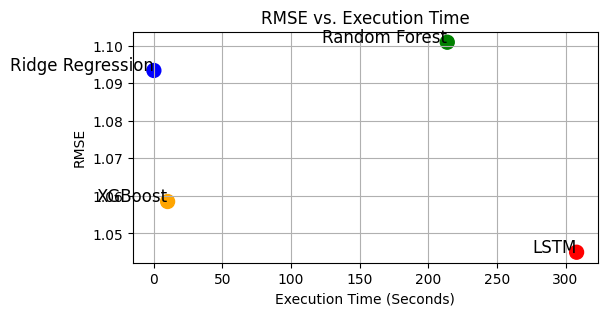

In [ ]:
# Visual comparisons of RMSE values
models = ["Ridge Regression", "Random Forest", "XGBoost", "LSTM"]
rmse_values = [rmse_ridge, rmse_rf, rmse_xgb, rmse_lstm]  # From your results
exec_times = [time_ridge, time_rf, time_xgb, time_lstm]  # execution times
plt.figure(figsize=(6, 3))
plt.scatter(exec_times, rmse_values, color=["blue", "green", "orange", "red"], s=100)
plt.xlabel("Execution Time (Seconds)")
plt.ylabel("RMSE")
plt.title("RMSE vs. Execution Time")
plt.grid(True)

# Annotate each model
for i, model in enumerate(models):
    plt.text(exec_times[i], rmse_values[i], model, fontsize=12, ha="right")

plt.show()


Ridge Regression provides a baseline performance with relatively low R² and RMSE/MAE values, but it's the fastest. Its linear nature may not capture complex relationships in the data well.

Random Forest has a slightly higher RMSE and a lower R² compared to Ridge Regression. While it can capture non-linearity, it might be overfitting or may not be the best choice for this dataset. Notably, it has a very long execution time.

XGBoost achieves the lowest RMSE and MAE, along with the highest R² score. This indicates the best performance among the models. It balances predictive accuracy with a reasonable execution time.

LSTM performs very close to XGBoost in terms of RMSE and R², but its MAE is slightly higher. However, it has the longest execution time, making it computationally expensive.

Considering the trade-off between accuracy and execution time, XGBoost has the lowest errors and the highest R² score, suggesting it captures the patterns in the data well.

Other Considerations: If speed is critical, Ridge Regression might be an acceptable alternative despite lower accuracy. If you have more data and computational resources, further tuning of LSTM or exploration of other deep learning models could potentially lead to improved performance. However, with current results, XGBoost is the recommended model.

# 4. Hyperparameter Tuning for **XGBoost**




In [ ]:

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.6, 0.8, 1.0]
}

# Create XGBRegressor instance
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters:", grid_search.best_params_)
xgb_best_f1 = grid_search.best_estimator_



Fitting 3 folds for each of 81 candidates, totalling 243 fits


KeyboardInterrupt: 

In [ ]:

# Train XGB model with evaluation set
xgb_best_f1.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
#    eval_metric="rmse",
    verbose=False
)

# Retrieve metrics
results = xgb_best_f1.evals_result()

# Plot RMSE for training and validation
plt.figure(figsize=(10, 6))
plt.plot(results['validation_0']['rmse'], label='Train RMSE')
plt.plot(results['validation_1']['rmse'], label='Validation RMSE')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Training vs. Validation RMSE')
plt.legend()
plt.show()


In [ ]:
import pickle

# Save the model to a file using pickle
filename = 'xgb_best_model.pkl'  # Choose a filename
with open(filename, 'wb') as file:
    pickle.dump(xgb_best_f1, file)

print(f"Model saved to: {filename}")

# 5. Model Interpretability and Feature importance

## 5.1 Feature importance from XGBoost model

In [ ]:
# Get feature importance from the trained model
feature_importance = xgb_best_f1.feature_importances_

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importance)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


## 5.2 SHAP model interpretation and top feature identification


In [ ]:
import shap

# SHAP explanation
explainer = shap.Explainer(xgb_best_f1)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


Feature Importance: Features are ranked by their overall importance in the model (from top to bottom).

Feature Impact: The horizontal location of points shows whether the feature value is associated with a higher or lower prediction.

## 5.3 LIME

In [ ]:
# Initialize the LIME explainer
lime_explainer = LimeTabularExplainer(
    training_data=X_train.values,  # Use training datath the row index you want to explain

# Explain the prediction for the selected instanc for scaling
    mode='regression',
  feature_names=X_train.columns,
    training_labels=y_train.mean(axis=1),  # Simplify to mean for single value targets
    verbose=True
)

# Select a random instance from the test set
instance = X_test.iloc[1].values  # Replace 0 wie
lime_explanation = lime_explainer.explain_instance(
    data_row=instance,
    predict_fn=xgb_best_f1.predict  # Use the best model for predictions
)

# Visualize the explanation
lime_explanation.show_in_notebook(show_table=True)
lime_explanation.save_to_file('lime_explanation.html')

# 6. Threshold Identification

In [ ]:
# Save predictions to a file
results_df_f1 = pd.DataFrame({
    'datetime': X_test.index,  # Adjust if your index contains datetime
    # Concatenate actual and predicted values column-wise
}, index=X_test.index) # set index to same as X_test
results_df_f1 = pd.concat([results_df_f1, y_test, pd.DataFrame(y_pred, index=X_test.index)], axis=1) # Concatenate dataframes
results_df_f1.columns = ['datetime'] + list(y_test.columns) + [f'pred_{col}' for col in y_test.columns] #Rename columns
results_df_f1.to_csv('prediction_results_f1.csv', index=False)
print("Predictions saved to 'prediction_results.csv'")


In [ ]:
plt.figure(figsize=(12, 6))

actual_columns = y_test.columns
actual_values = results_df_f1[actual_columns]

# Plot actual values (using the first actual column as a representation)
plt.plot(results_df_f1['datetime'], actual_values.iloc[:, 0], label='Actual', marker='o')

# Predicted values are in columns named like 'pred_UgnZon1TempRegAr_TC1', etc.
predicted_columns = [f'pred_{col}' for col in y_test.columns]
predicted_values = results_df_f1[predicted_columns]

# Plot predicted values (using the first predicted column as a representation)
plt.plot(results_df_f1['datetime'], predicted_values.iloc[:, 0], label='Predicted', marker='x')

plt.xlabel('Datetime')
plt.ylabel('Values')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()


Residual Analysis

Residuals are the differences between actual and predicted values. Analyzing them helps determine how well your model performs across the dataset. Here's the code to calculate and analyze residuals:

This gives you an understanding of the error distribution. A good model typically has residuals centered around 0 with a narrow spread.

In [ ]:
# Define thresholds as mean ± k * standard deviation of residuals
k = 2  # Customize k based on desired confidence interval

# Get the predicted values column (assuming the first predicted column as representative)
predicted_column = predicted_columns[0]  # Using the first predicted column name from predicted_columns list

# Calculate optimal thresholds using the predicted values column
optimal_lower_threshold = results_df_f1[predicted_column].mean() - k * residuals.std()
optimal_upper_threshold = results_df_f1[predicted_column].mean() + k * residuals.std()

print(f"Optimal lower threshold: {optimal_lower_threshold}")
print(f"Optimal upper threshold: {optimal_upper_threshold}")

# Visualize thresholds
plt.figure(figsize=(12, 6))

actual_columns = y_test.columns
# Access the actual values from the DataFrame using the actual_columns
actual_values = results_df_f1[actual_columns]

# Plot actual values (using the first actual column as a representation)
plt.plot(results_df_f1['datetime'], actual_values.iloc[:, 0], label='Actual', marker='o', color='blue')

In [ ]:
# Plot predicted values along with thresholds
plt.figure(figsize=(12, 6))

# Get the predicted values column (using the first predicted column as a representation)
predicted_column = predicted_columns[0]  # Using the first predicted column name from predicted_columns list

# Plot predicted values using the selected predicted column
plt.plot(results_df_f1['datetime'], results_df_f1[predicted_column], label='Predicted', marker='o', color='orange')

# Plot thresholds as horizontal lines
plt.axhline(optimal_upper_threshold, color='red', linestyle='--', label='Optimal Upper Threshold')
plt.axhline(optimal_lower_threshold, color='green', linestyle='--', label='Optimal Lower Threshold')

# Add labels, legend, and title
plt.xlabel('Datetime')
plt.ylabel('Predicted Values')
plt.title('Predicted Values with Optimal Thresholds')
plt.legend()
plt.grid(True)
plt.show()


Algorithm Comparison:

Ridge Regression (Linear model for baseline comparison).


Non-Linear Models
Random Forest, LightGBM, and XGBoost, LSTM  for non-linear modeling.
1. Random Forest Regressor
Description: Random Forest is an ensemble learning method that builds multiple decision trees and aggregates their results to make predictions. It captures non-linear relationships effectively.
Why Used:
Thermocouple data often exhibits non-linear relationships between input features (e.g., temperatures, voltage readings) and target variables.
Random Forest is versatile and handles high-dimensional data without requiring extensive preprocessing.

2. LightGBM Regressor (via MultiOutputRegressor)
Description: LightGBM (Light Gradient Boosting Machine) is a gradient boosting framework known for its efficiency and speed. When wrapped in MultiOutputRegressor, it handles multi-output regression.
Why Used:
Gradient boosting captures intricate patterns and non-linear relationships, which are often present in thermocouple data.
Suitable for datasets with large feature sets and provides quick training times.

3. XGBoost Regressor (via MultiOutputRegressor)
Description: XGBoost (Extreme Gradient Boosting) is another gradient boosting method with advanced features like regularization and handling sparse data.
Why Used:
Thermocouple data may have complex structures and occasional missing values, both of which XGBoost handles well.
Provides fine-grained control over the model and often achieves high predictive accuracy.

4. Long Short-Term Memory (LSTM)
Description: LSTM is a type of recurrent neural network (RNN) designed to capture temporal dependencies in sequential data.
Why Used:
If your thermocouple data has a time series element (e.g., readings captured over time), LSTM is ideal for modeling such temporal relationships.
LSTM can learn patterns over time, such as thermal dynamics, which are crucial for accurate predictions.



Evaluation metrics: MSE, MAE, R², and processing time.

Hyperparameter Tuning: Example grid search for Random Forest with TimeSeriesSplit.

SHAP Interpretability: Identifies most influential features and explains the model’s predictions.

In [ ]:
import matplotlib.pyplot as plt

# Plot predicted values along with thresholds
plt.figure(figsize=(12, 6))

# Get the predicted values column (using the first predicted column as representative)
predicted_column = predicted_columns[0]  # Using the first predicted column name from predicted_columns list

# Plot predicted values using the selected predicted column
plt.plot(results_df['datetime'], results_df[predicted_column], label='Predicted', marker='o', color='orange')

# Plot thresholds as horizontal lines
plt.axhline(optimal_upper_threshold, color='red', linestyle='--', label='Optimal Upper Threshold')
plt.axhline(optimal_lower_threshold, color='green', linestyle='--', label='Optimal Lower Threshold')

# Add labels, legend, and title
plt.xlabel('Datetime')
plt.ylabel('Predicted Values')
plt.title('Predicted Values with Optimal Thresholds')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Add thresholds to the results DataFrame
results_df['lower_threshold'] = optimal_lower_threshold
results_df['upper_threshold'] = optimal_upper_threshold

# Save the DataFrame to a CSV file
results_df.to_csv('threshold_results.csv', index=False)
print("Threshold results saved as 'threshold_results.csv'")


In [ ]:
from sklearn.multioutput import MultiOutputRegressor

# Wrap models that don't support multi-output in MultiOutputRegressor
algorithms = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "LightGBM": MultiOutputRegressor(LGBMRegressor(random_state=42)),
    "XGBoost": MultiOutputRegressor(XGBRegressor(random_state=42))
}

results = []
for name, model in algorithms.items():
    start_time = time.time()
    model.fit(X_train, y_train)  # Train the model with multi-output
    y_pred = model.predict(X_test)  # Predict all target columns simultaneously
    elapsed_time = time.time() - start_time
    mse = mean_squared_error(y_test, y_pred, multioutput='uniform_average')  # Average across all columns
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred, multioutput='variance_weighted')  # Weighted average
    results.append({"Model": name, "MSE": mse, "MAE": mae, "R2": r2, "Time (s)": elapsed_time})



In [ ]:
results

Based on above results, LightGBM has the best performance in terms of MSE, MAE, and R², and it also processes much faster compared to the others.

## Linear models

Exploration of Patterns: Linear models like Lasso and Ridge were used to establish baseline performance and identify linear trends in the data.

Capturing Complex Dynamics: Non-linear models like Random Forest, LightGBM, XGBoost, and LSTM were included to capture intricate patterns, interactions, and temporal dependencies that linear models might miss.

Comprehensive Benchmarking: Comparing these models helps understand the trade-offs between simplicity, interpretability, and accuracy for your thermocouple dataset.

In [ ]:
# Define time intervals for splitting
training_start = '2024-12-01 06:00:00'
training_end = '2025-03-01 05:59:00'
test_start = '2025-03-01 06:00:00'
test_end = '2025-04-01 05:59:00'
validation_start = '2025-04-01 06:00:00'
validation_end = '2025-04-24 06:00:00'

# Split the data based on intervals
train_data = df[(df['DateTime'] >= training_start) & (df['DateTime'] <= training_end)]
test_data = df[(df['DateTime'] >= test_start) & (df['DateTime'] <= test_end)]
val_data = df[(df['DateTime'] >= validation_start) & (df['DateTime'] <= validation_end)]

# Separate features (X) and labels (y) for training, testing, and validation sets
X2_train = train_data[input_f2]
y2_train = train_data[target_f2]

X2_test = test_data[input_f2]
y2_test = test_data[target_f2]

X2_val = val_data[input_f2]
y2_val = val_data[target_f2]

# Check the sizes of the splits (optional)
print("X_train shape:", X2_train.shape)
print("y_train shape:", y2_train.shape)
print("X_test shape:", X2_test.shape)
print("y_test shape:", y2_test.shape)
print("X_val shape:", X2_val.shape)
print("y_val shape:", y2_val.shape)

X_train shape: (129602, 13)
y_train shape: (129602, 15)
X_test shape: (44581, 13)
y_test shape: (44581, 15)
X_val shape: (33122, 13)
y_val shape: (33122, 15)


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time

# Train Ridge Model
ridge = Ridge()
start_time = time.time()
ridge.fit(X2_train, y2_train)
y2_pred = ridge.predict(X2_test)
execution_time = time.time() - start_time
time_ridge = round(execution_time, 2)


# Evaluation
rmse_ridge = np.sqrt(mean_squared_error(y2_test, y2_pred))
mae_ridge = mean_absolute_error(y2_test, y2_pred)
r2_ridge = r2_score(y2_test, y2_pred)
print(f"Ridge Regression - RMSE: {rmse_ridge}, MAE: {mae_ridge}, R²: {r2_ridge}, Time: {time_ridge}s")

Ridge Regression - RMSE: 0.9417847886852166, MAE: 0.5258905522823415, R²: 0.45078624920022586, Time: 0.06s


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
start_time = time.time()
rf.fit(X2_train, y2_train)
y2_pred = rf.predict(X2_test)
execution_time = time.time() - start_time

# Evaluation
rmse_rf = np.sqrt(mean_squared_error(y2_test, y2_pred))
mae_rf = mean_absolute_error(y2_test, y2_pred)
r2_rf = r2_score(y2_test, y2_pred)
time_rf = round(execution_time, 2)
print(f"Random Forest - RMSE: {rmse_rf}, MAE: {mae_rf}, R²: {r2_rf}, Time: {time_rf}s")


Random Forest - RMSE: 1.0985999565021058, MAE: 0.49277291721436395, R²: 0.25262376387862745, Time: 320.97s


In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100)
start_time = time.time()
xgb_model.fit(X2_train, y2_train)
y2_pred = xgb_model.predict(X2_test)
execution_time = time.time() - start_time

# Evaluation
rmse_xgb = np.sqrt(mean_squared_error(y2_test, y2_pred))
mae_xgb = mean_absolute_error(y2_test, y2_pred)
r2_xgb = r2_score(y2_test, y2_pred)
time_xgb = round(execution_time, 2)
print(f"XGBoost - RMSE: {rmse_xgb}, MAE: {mae_xgb}, R²: {r2_xgb}, Time: {time_xgb}s")

XGBoost - RMSE: 1.0612067598625818, MAE: 0.46903422474861145, R²: 0.30369624495506287, Time: 23.14s


In [ ]:
import numpy as np
import time
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ensure y_train and y_test are numpy arrays (shape: [samples, targets])
y2_train = np.array(y2_train)
y2_test = np.array(y2_test)

# Reshape X for LSTM: (samples, timesteps, features)
X2_train_LSTM = np.reshape(X2_train.values, (X2_train.shape[0], 1, X2_train.shape[1]))
X2_test_LSTM = np.reshape(X2_test.values, (X2_test.shape[0], 1, X2_test.shape[1]))

# Define LSTM model (output should match number of targets, e.g., 15)
lstm_model = Sequential([
    LSTM(50, activation="relu", return_sequences=True, input_shape=(1, X2_train.shape[1])),
    LSTM(50, activation="relu"),
    Dense(y2_train.shape[1])  # Automatically adapts to your y_train shape
])

# Compile and fit
lstm_model.compile(optimizer="adam", loss="mse")
start_time = time.time()
lstm_model.fit(X2_train_LSTM, y2_train, epochs=10, batch_size=16, verbose=0)
execution_time = time.time() - start_time

# Predictions
y2_pred = lstm_model.predict(X2_test_LSTM)

# Evaluation
rmse_lstm = np.sqrt(mean_squared_error(y2_test, y2_pred))
mae_lstm = mean_absolute_error(y2_test, y2_pred)
r2_lstm = r2_score(y2_test, y2_pred)
time_lstm = round(execution_time, 2)

print(f"LSTM - RMSE: {rmse_lstm}, MAE: {mae_lstm}, R²: {r2_lstm}, Time: {time_lstm}s")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1394/1394 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
LSTM - RMSE: 1.1250656468942908, MAE: 0.4962675006045802, R²: 0.21523969467055598, Time: 310.74s


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
import numpy as np

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
start_time = time.time()
lasso_model.fit(X2_train, y2_train)
y2_pred_lasso = lasso_model.predict(X2_test)
execution_time_lasso = time.time() - start_time

# Evaluation
rmse_lasso = np.sqrt(mean_squared_error(y2_test, y2_pred_lasso))
mae_lasso = mean_absolute_error(y2_test, y2_pred_lasso)
r2_lasso = r2_score(y2_test, y2_pred_lasso)
time_lasso = round(execution_time_lasso, 2)
print(f"Lasso - RMSE: {rmse_lasso}, MAE: {mae_lasso}, R²: {r2_lasso}, Time: {time_lasso}s")


Lasso - RMSE: 1.2595558582568565, MAE: 0.8918778528241899, R²: -0.009515083256653763, Time: 0.18s


In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
import numpy as np

# Convert targets to numpy arrays
y2_train = np.array(y2_train)
y2_test = np.array(y2_test)

# Reshape to 2D if targets are 1D
if y2_train.ndim == 1:
    y2_train = y2_train.reshape(-1, 1)
if y2_test.ndim == 1:
    y2_test = y2_test.reshape(-1, 1)

# Initialize lists to collect metrics

rmse_list, mae_list, r2_list = [], [], []


start_time = time.time()

for i in range(y2_train.shape[1]):
    try:
        # Fit ARIMA to one target column
        model = sm.tsa.ARIMA(y2_train[:, i], order=(1, 1, 1))
        model_fit = model.fit()
        y2_pred = model_fit.forecast(steps=len(y2_test))

        # Ensure shapes match
        y2_true = y2_test[:, i]
        y2_pred = np.array(y2_pred)

        # Compute metrics
        rmse = np.sqrt(mean_squared_error(y2_true, y2_pred))
        mae = mean_absolute_error(y2_true, y2_pred)
        r2 = r2_score(y2_true, y2_pred)

        # Store metrics
        rmse_list.append(rmse)
        mae_list.append(mae)
        r2_list.append(r2)
    except Exception as e:
        print(f"Column {i} failed with error: {e}")

execution_time = time.time() - start_time

# Aggregate metrics
rmse_arima = np.mean(rmse_list)
mae_arima = np.mean(mae_list)
r2_arima = np.mean(r2_list)
time_arima = round(execution_time, 2)

print(f"ARIMA - RMSE: {rmse_arima}, MAE: {mae_arima}, R²: {r2_arima}, Time: {time_arima}s")


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA - RMSE: 1.4456371091077171, MAE: 0.8583188034042549, R²: -0.3569044844717341, Time: 232.94s


In [ ]:
# Define results for each model
model_results = {
    "Model": ["Ridge Regression", "Random Forest", "XGBoost", "LSTM", "Lasso", "ARIMA"],
    "RMSE": [rmse_ridge, rmse_rf, rmse_xgb, rmse_lstm,rmse_lasso,rmse_arima],
    "MAE": [mae_ridge, mae_rf, mae_xgb, mae_lstm,mae_lasso,mae_arima],
    "R² Score": [r2_ridge, r2_rf, r2_xgb, r2_lstm,r2_lasso,r2_arima],
    "Execution Time (s)": [time_ridge, time_rf, time_xgb, time_lstm,time_lasso,time_arima]
}

# Convert to DataFrame
summary_df = pd.DataFrame(model_results)

# Display table
print(summary_df)


              Model      RMSE       MAE  R² Score  Execution Time (s)
0  Ridge Regression  0.941785  0.525891  0.450786                0.06
1     Random Forest  1.098600  0.492773  0.252624              320.97
2           XGBoost  1.061207  0.469034  0.303696               23.14
3              LSTM  1.125066  0.496268  0.215240              310.74
4             Lasso  1.259556  0.891878 -0.009515                0.18
5             ARIMA  1.445637  0.858319 -0.356904              232.94


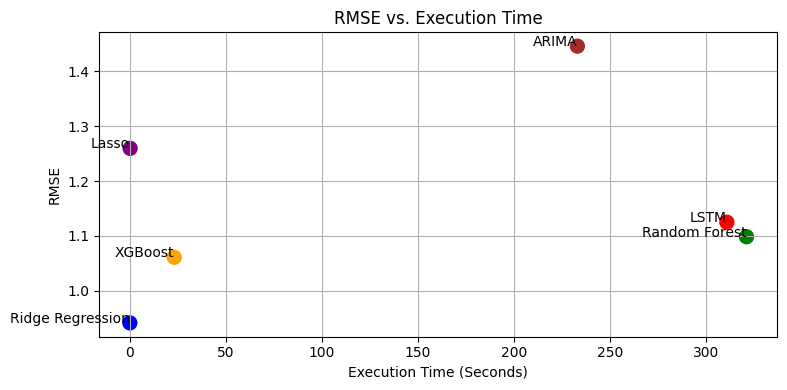

In [ ]:
import matplotlib.pyplot as plt

models = ["Ridge Regression", "Random Forest", "XGBoost", "LSTM", "Lasso", "ARIMA"]
rmse_values = [rmse_ridge, rmse_rf, rmse_xgb, rmse_lstm, rmse_lasso, rmse_arima]
exec_times = [time_ridge, time_rf, time_xgb, time_lstm, time_lasso, time_arima]

colors = ["blue", "green", "orange", "red", "purple", "brown"]  # 6 colors for 6 points

plt.figure(figsize=(8, 4))
plt.scatter(exec_times, rmse_values, color=colors, s=100)
plt.xlabel("Execution Time (Seconds)")
plt.ylabel("RMSE")
plt.title("RMSE vs. Execution Time")
plt.grid(True)

# Annotate each model
for i, model in enumerate(models):
    plt.text(exec_times[i], rmse_values[i], model, fontsize=10, ha="right")

plt.tight_layout()
plt.show()


In [ ]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.6, 0.8, 1.0]
}

# Create XGBRegressor instance
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)
grid_search.fit(X2_train, y2_train)

# Best parameters and model
print("Best parameters:", grid_search.best_params_)
xgb_best_f2 = grid_search.best_estimator_


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.6}


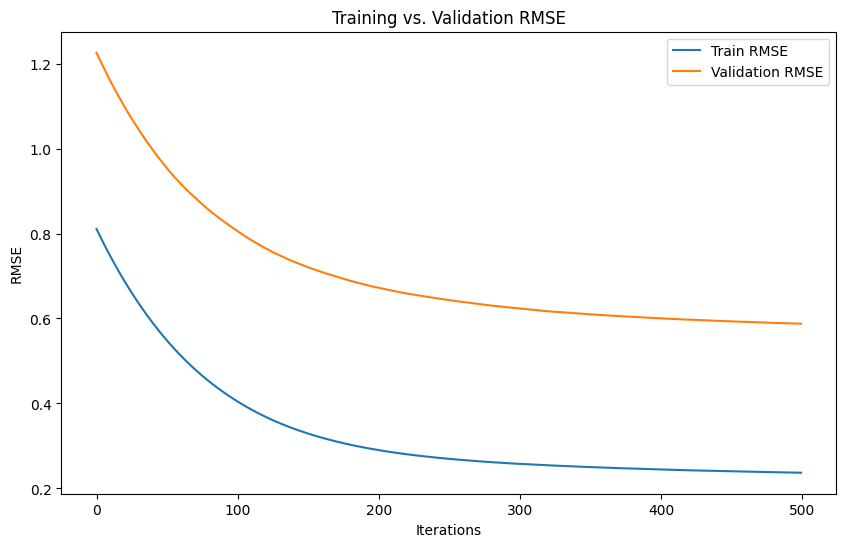

In [ ]:
# Train XGB model with evaluation set
xgb_best_f2.fit(
    X2_train, y2_train,
    eval_set=[(X2_train, y2_train), (X2_val, y2_val)],
#    eval_metric="rmse",
    verbose=False
)

# Retrieve metrics
results = xgb_best_f2.evals_result()

# Plot RMSE for training and validation
plt.figure(figsize=(10, 6))
plt.plot(results['validation_0']['rmse'], label='Train RMSE')
plt.plot(results['validation_1']['rmse'], label='Validation RMSE')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Training vs. Validation RMSE')
plt.legend()
plt.show()

In [ ]:
import pickle

# Save the model to a file using pickle
filename = 'xgb_best_model.pkl'  # Choose a filename
with open(filename, 'wb') as file:
    pickle.dump(xgb_best_f2, file)

print(f"Model saved to: {filename}")

Model saved to: xgb_best_model.pkl
